In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
available_devices = []

if torch.cuda.is_available():
    available_devices.append('cuda')
if hasattr(torch, 'xpu') and torch.xpu.is_available():
    available_devices.append('xpu')
if hasattr(torch, 'cpu') and torch.cpu.is_available():
    available_devices.append('cpu')
else:
    available_devices.append('cpu')  # Default to CPU if .cpu.is_available() is not present

print("Available devices:", available_devices)

Available devices: ['cpu']


In [3]:
# The following code loads the FashionMNIST dataset for training.
# FashionMNIST is a dataset of Zalando's article images—consisting of 60,000 training examples and 10,000 test examples.
# Each example is a 28x28 grayscale image, associated with a label from 10 classes (such as T-shirt/top, Trouser, Pullover, etc.).
# It is often used as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

# 'datasets.FashionMNIST' is a PyTorch dataset class for loading the FashionMNIST data.
# 'root="data"' specifies the directory where the dataset will be stored.
# 'train=True' means we are loading the training set.
# 'download=True' will download the dataset if it is not already present in the specified root directory.
# 'transform=ToTensor()' converts the images to PyTorch tensors, which are required for model training.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [4]:
test_data = datasets.FashionMNIST(
    root="data",           # Directory where the dataset will be stored or loaded from.
    train=False,           # Loads the test set (not used for training).
    download=True,         # Downloads the dataset if it's not already present in the root directory.
    transform=ToTensor()   # Converts images to PyTorch tensors.
)

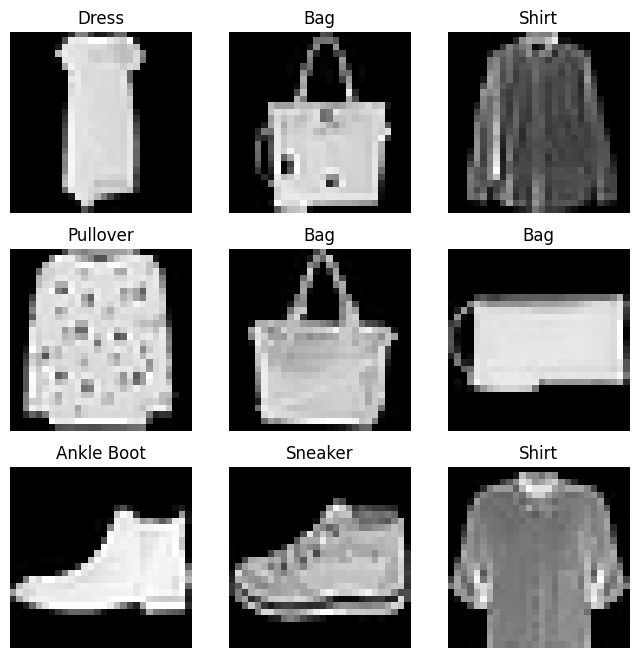

In [5]:
# Dictionary mapping label indices to class names for FashionMNIST
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

# Create a new matplotlib figure with a specified size
figure = plt.figure(figsize=(8,8))

# Number of columns and rows for the subplot grid (3x3)
cols, rows = 3, 3

# Get the total number of samples in the training dataset
training_data_len = len(training_data)

# Loop to plot 9 random images from the training dataset
for i in range(1, cols * rows + 1):
    # Randomly select an index for a sample from the training data
    sample_idx = int(torch.randint(training_data_len, size=(1,)).item())
    # Retrieve the image and label at the selected index
    img, label = training_data[sample_idx]
    # Add a subplot to the figure at the correct position
    figure.add_subplot(rows, cols, i)
    # Set the title of the subplot to the class name
    plt.title(labels_map[label])
    # Hide the axis for better visualization
    plt.axis("off")
    # Display the image (squeeze removes single-dimensional entries)
    plt.imshow(img.squeeze(), cmap="gray")

# Show the complete figure with all subplots
plt.show()

### Understanding Subplots in `matplotlib.pyplot`

A subplot in `matplotlib.pyplot` allows you to display multiple plots (axes) in a single figure. This is useful for comparing different datasets or visualizations side by side.

- **Creating Subplots:**  
    Use `plt.subplot(nrows, ncols, index)` to create a grid of subplots, where:
    - `nrows` is the number of rows,
    - `ncols` is the number of columns,
    - `index` is the position of the subplot (starting from 1).

- **Example:**  
    ```python
    plt.subplot(2, 3, 4)
    ```
    This creates a subplot in a 2-row by 3-column grid, at position 4.

- **Looping for Multiple Subplots:**  
    You can use a loop to fill each subplot with different data, as shown in the notebook:
    ```python
    for i in range(1, cols * rows + 1):
            plt.subplot(rows, cols, i)
            # plot data here
    ```

- **Alternative:**  
    `plt.subplots()` can also be used to create a grid of subplots and returns figure and axes objects for more control.

- **Hiding Axes:**  
    Use `plt.axis("off")` to hide axis ticks and labels for a cleaner look.

Subplots are essential for visualizing multiple images or plots in a structured layout within a single figure.

In [6]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomerImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_name = str(self.img_labels.iloc[idx, 0])
        img_path = os.path.join(self.img_dir, img_name)
        image = decode_image(img_path)
        label = str(self.img_labels.iloc[idx, 1])
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch size: torch.Size([64])


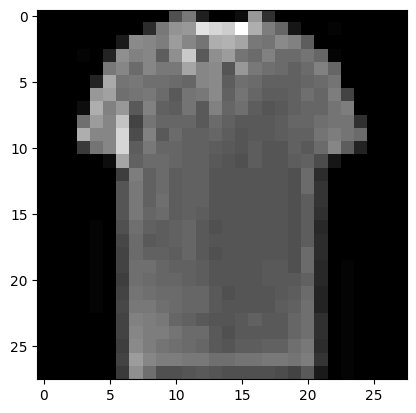

Label: 0


In [8]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch size: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")